<a href="https://colab.research.google.com/github/otworiallan/otworiallan/blob/main/PyTorch_WorkFlow_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
import torch
from torch import nn

import numpy as np
import matplotlib.pyplot as plt

In [185]:
device = "cuda" if torch.cuda.is_available() else "cpu"

weight = 0.3
bias = 0.9

start = 0
end = 2
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

train_split = int(0.8 * len(X))
train_split

160

In [186]:
X_train = X[:train_split:].type(torch.float).to(device)
y_train = y[:train_split:].type(torch.float).to(device)
X_test = X[train_split::].type(torch.float).to(device)
y_test = y[train_split::].type(torch.float).to(device)
X_train.dtype

torch.float32

In [187]:
def plot_predictions(train_data=X_train.cpu(), train_label=y_train.cpu(),
                     test_data=X_test.cpu(), test_label=y_test.cpu(),
                     predictions=None):
    """
    Plots training data, test data and compares predictions
    """

    plt.figure(figsize=(12,7))

    plt.scatter(train_data, train_label, c="b", s=4, label="Training Data")

    plt.scatter(test_data, test_label, c="g", s=4, label="Test data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")



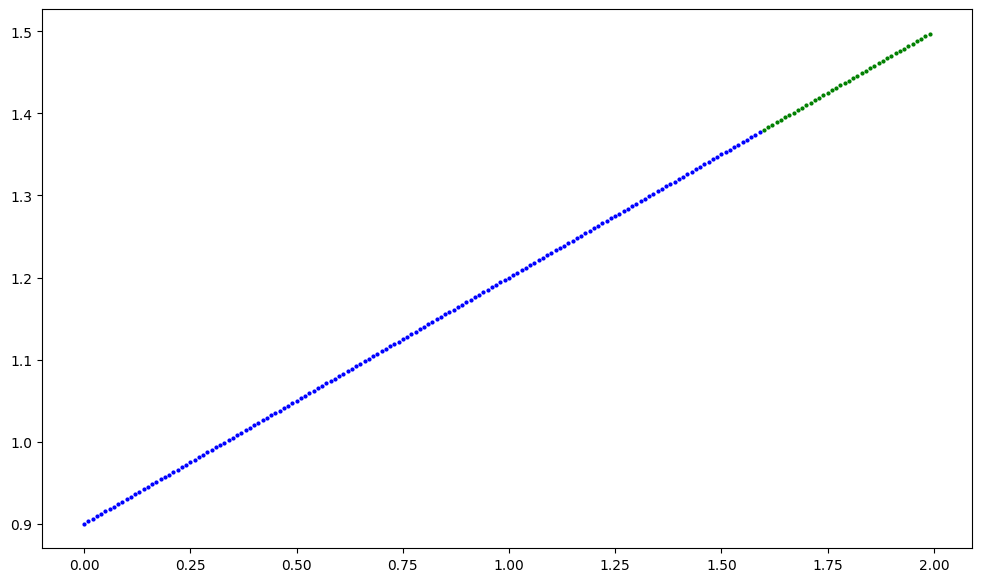

In [188]:
plot_predictions()

In [189]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        torch.manual_seed(0)
        self.linear_layer = nn.Linear(in_features=1, out_features=1,
                                      dtype=torch.float)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


In [190]:
model = LinearRegressionModel()
model.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [191]:
loss = nn.L1Loss(reduction="mean")
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [192]:
def train_loop(epochs):
    for epoch in range(epochs):
        model.train()
        y_preds = model(X_train)
        train_loss = loss(y_preds, y_train)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 20 == 0:
            print(f"Epoch: {epoch} -> Loss: {train_loss}")



In [193]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.0075]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.5364], device='cuda:0'))])

In [194]:
def test_loop():
    model.eval()
    with torch.inference_mode():
        return model(X_test)


In [195]:
train_loop(epochs=300)

Epoch: 0 -> Loss: 0.6080083847045898
Epoch: 20 -> Loss: 0.2816036343574524
Epoch: 40 -> Loss: 0.005812705960124731
Epoch: 60 -> Loss: 0.005812705960124731
Epoch: 80 -> Loss: 0.005812705960124731
Epoch: 100 -> Loss: 0.005812705960124731
Epoch: 120 -> Loss: 0.005812705960124731
Epoch: 140 -> Loss: 0.005812705960124731
Epoch: 160 -> Loss: 0.005812705960124731
Epoch: 180 -> Loss: 0.005812705960124731
Epoch: 200 -> Loss: 0.005812705960124731
Epoch: 220 -> Loss: 0.005812705960124731
Epoch: 240 -> Loss: 0.005812705960124731
Epoch: 260 -> Loss: 0.005812705960124731
Epoch: 280 -> Loss: 0.005812705960124731


In [196]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2948]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.9099], device='cuda:0'))])

In [197]:
y_preds = test_loop()

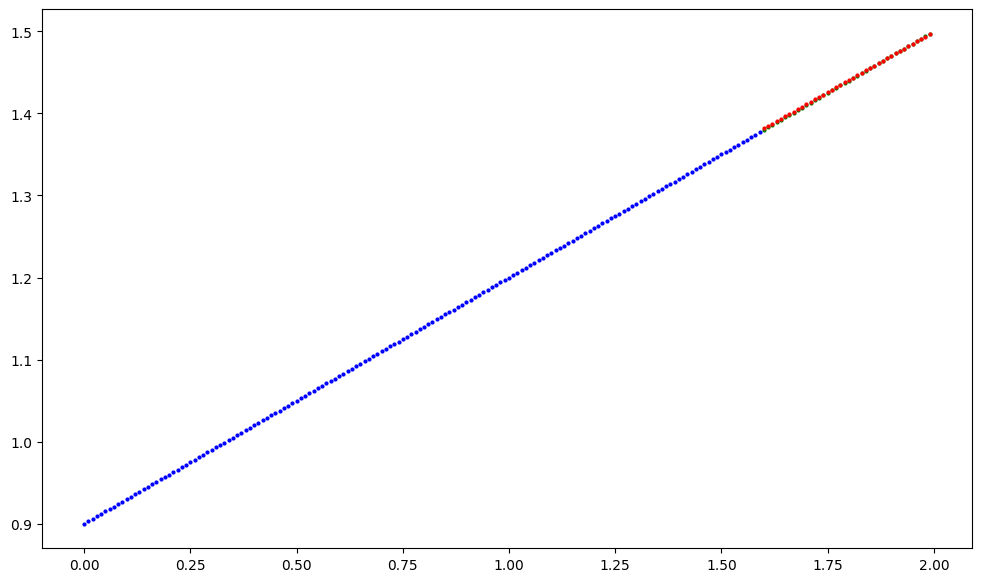

In [198]:
plot_predictions(predictions=y_preds.cpu())

In [199]:
#Saving and Loading the Model's State Dict

from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "linear_regression_models_exercise.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

In [200]:
#loading a model
loaded_model = LinearRegressionModel()
loaded_model.to(device)

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [201]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.0075]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.5364], device='cuda:0'))])

In [202]:
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=True))

<All keys matched successfully>

In [203]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2948]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.9099], device='cuda:0'))])

In [204]:
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)

In [205]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')